In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1)

In [3]:
y = 4 + 3*X + np.random.rand(100,1) # y = 4+3x+e e~N(0,1)

In [4]:
X

array([[0.64790273],
       [1.79638317],
       [0.75855574],
       [0.08154712],
       [0.22176609],
       [0.73449903],
       [0.2602965 ],
       [0.35975946],
       [0.23519921],
       [0.78498734],
       [0.32392022],
       [1.26289763],
       [1.86123977],
       [1.07859898],
       [1.82098551],
       [0.62721959],
       [1.45615654],
       [0.74092708],
       [0.64618473],
       [1.77532061],
       [0.13453243],
       [1.200175  ],
       [0.13485245],
       [1.6093833 ],
       [1.07159353],
       [0.54165583],
       [1.26085728],
       [0.2717098 ],
       [1.47143128],
       [0.30139229],
       [0.64524913],
       [1.32436214],
       [0.59866971],
       [0.58873359],
       [1.95516193],
       [1.35961956],
       [1.95351579],
       [0.57263059],
       [0.19879133],
       [1.99436822],
       [1.84099887],
       [1.78397573],
       [1.56022777],
       [1.19691712],
       [1.87462094],
       [1.20047481],
       [0.57760773],
       [1.778

### 회귀계수 추정

In [5]:
# 정규방정식
# b=[(X^T*X)^(-1)]*[X^T*y]

In [7]:
X_b = np.c_[np.ones((100,1)),X] # b0 계수1 추가

In [11]:
# optimal beta
theta_beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_beta

array([[4.52995941],
       [2.94052649]])

    추정된 회귀식
y = 4.52995941 + 2.94052649*X

### 예측 y = X_new*theta_beta

In [14]:
X_new = np.array(([0],[2]))

In [15]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [16]:
y_predict = X_new_b.dot(theta_beta)

In [17]:
y_predict

array([[ 4.52995941],
       [10.41101239]])

In [18]:
import matplotlib.pyplot as plt

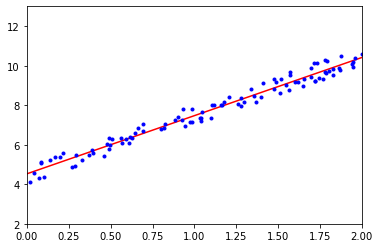

In [22]:
plt.plot(X_new,y_predict,'r-') # 새로운 데이터의 예측 값
plt.plot(X,y,'b.')
plt.axis([0,2,2,13])
plt.show()

### sklearn이용하기

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lin_reg = LinearRegression()

In [25]:
lin_reg.fit(X,y)

LinearRegression()

In [26]:
lin_reg.intercept_

array([4.52995941])

In [27]:
lin_reg.coef_

array([[2.94052649]])

In [28]:
lin_reg.predict(X_new)

array([[ 4.52995941],
       [10.41101239]])

## 다항회귀
- NOTE. 선형회귀모형은 파라미터가 선형인 모델이다.
- y=beta_0+beta_1X1+beta_2X2^2는 선형회귀 모델인가?

In [29]:
import numpy.random as rnd

In [30]:
np.random.seed(42)

In [34]:
# 데이터생성
m = 100
X = 6*rnd.rand(m,1)-3 # 6*(0,1)-3 -> -3,3
y = 0.5*X**2 + X + 2 + rnd.randn(m,1) # y=0.5*X^2+X+2+error(0,1)

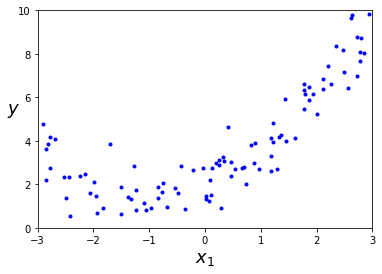

In [33]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize =18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
#save_fig("quadratic_data_plot")
plt.show()

In [35]:
# 모델학습 (다항회귀모델)
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [37]:
X[0]

array([-2.93187813])

In [38]:
X_poly[0]

array([-2.93187813,  8.59590938])

In [39]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [40]:
lin_reg.intercept_, lin_reg.coef_

(array([1.9326696]), array([[0.99165946, 0.48476612]]))

    추정된 회귀식
y = 0.48476612X^2 + 0.99165946X + 1.9326696

### 학습곡선
- 항의 degree를 바꿔가며 적합한 degree찾기
- 학습 데이터와 검증 데이터 나누어 MSE비교

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right",fontsize=14) # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE",fontsize=14) # not shown

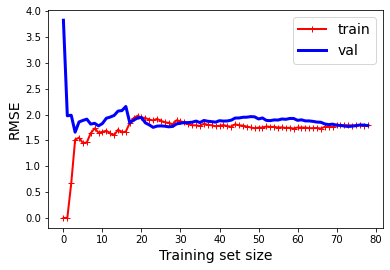

In [45]:
plot_learning_curves(lin_reg,X,y) # 과적합 X
plt.show()

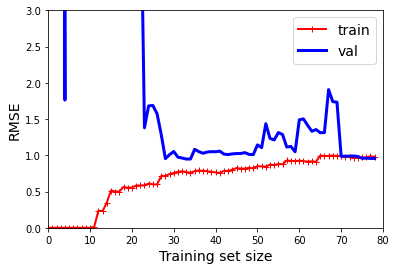

In [46]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression())])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

MSE = Bias^2(편향) + Var(변동성) 둘은 trade-off관계
- 모델이 복잡하면 bias 하락 var 높음 불안정 -> 과대적합
- 모델이 naive하면 bias 상승 var 낮음 안정적 -> x

## 정규화

In [1]:
import numpy as np
import numpy.random as rnd
# 데이터 생성
m = 100
X = 6*rnd.rand(m,1)-3 # 6*(0,1)-3 -> -3,3
y = 0.5*X**2 + X + 2 + rnd.randn(m,1) # y=0.5*X^2+X+2+error(0,1)

In [4]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.21055813]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="12",max_iter=1000,tol=1e-3,random_state=42)
sgd_reg.fit(X,y.label())
sgd_reg.predict([[1.5]])

ValueError: Penalty 12 is not supported. 

In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.1695957])

In [11]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5, random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.16758045])

## 로지스틱 회귀분석
### Iris 데이터셋
데이터 설명: 아이리스(붓꽃) 데이터에 대한 데이터이다. 꽃잎의 각 부분의 너비와 길이등을 측정한 데이터이며 150개의 레코드로 구성되어 있다. 아이리스 꽃은 아래의 그림과 같다. 프랑스의 국화라고 한다.

필드의 이해:
- 데이터의 이해를 돕기 위해 포함된 6개의 변수에 대하여 간략하게 설명한다.
- 총 6개의 필드로 구성되어있다. caseno는 단지 순서를 표시하므로 분석에서 당연히 제외한다.
- 2번째부터 5번쨰의 4개의 필드는 입력변수로 사용되고, 맨 아래의 Species 속성이 목표(종속) 변수로 사용된다.
- Sepal Length 꽃받침의 길이 정보이다.
- Sepla Width 꽃받침의 너비 정보이다.
- Petal Length 꽃잎의 길이 정보이다.
- Petal Width 꽃잎의 너비 정보이다.
- Species 꽃의 종류 정보이다. setosa / versicolor / virginica의 3종류로 구분된다.

In [13]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
X=iris['data'][:,3:] # 꽃잎의 너비
# iris.data

In [18]:
y=(iris['target']==2).astype(np.int)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

In [22]:
log_reg.fit(X,y)

LogisticRegression()

In [23]:
# prediction

X_new = np.linspace(0,3,1000).reshape(-1,1)

In [24]:
X_new.shape

(1000, 1)

In [25]:
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [26]:
y_proba = log_reg.predict_proba(X_new) # 1000 observations.. -> 1000 probabilities..

In [27]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

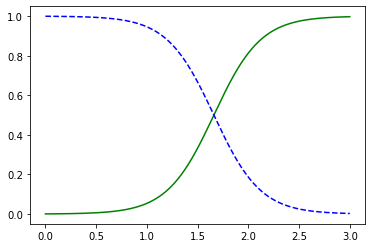

In [30]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Iris-Virginica 아님')
plt.show()

In [32]:
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]

In [33]:
decision_boundary

array([1.66066066])

In [34]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

로지스틱 회귀에서의 rasso, ridge는 비용함수만 로지스틱 회귀 비용함수로 바꿔주면 가능

In [35]:
LogisticRegression(C=1)

LogisticRegression(C=1)